In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path= 'Data/Tarjetas_de_cr_dito_y_d_bito_20240804.csv'
data = pd.read_csv(path)

In [4]:
data.head()

,TIPOENTIDAD,CODIGOENTIDAD,NOMBREENTIDAD,FECHACORTE,COD_UCA,NOMBRE_UCA,SUBCUENTA,DESCRIPCION,PERSONA_NATURAL,PERSONA_JURIDICA,TOTAL_TARJETAS
0,1,1,BANCO DE BOGOTA S. A.,31/12/2018,1,CREDIBANCO-VISA,5,Número total de tarjetas de crédito vigentes ...,683297.0,57740.0,741037.0
1,1,1,BANCO DE BOGOTA S. A.,30/06/2022,1,CREDIBANCO-VISA,5,Número total de tarjetas de crédito vigentes ...,940415.0,39615.0,980030.0
2,1,1,BANCO DE BOGOTA S. A.,30/06/2017,1,CREDIBANCO-VISA,5,Número total de tarjetas de crédito vigentes ...,611630.0,60512.0,672142.0
3,1,1,BANCO DE BOGOTA S. A.,31/05/2015,1,CREDIBANCO-VISA,5,Número total de tarjetas de crédito vigentes ...,487795.0,53291.0,541086.0
4,1,1,BANCO DE BOGOTA S. A.,31/12/2022,1,CREDIBANCO-VISA,5,Número total de tarjetas de crédito vigentes ...,1071401.0,40061.0,1111462.0


In [5]:
data.shape

(148530, 11)

In [6]:
print(f'El dataset tiene {data.shape[0]} filas y {data.shape[1]} columnas.')

El dataset tiene 148530 filas y 11 columnas.


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148530 entries, 0 to 148529
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TIPOENTIDAD       148530 non-null  int64  
 1   CODIGOENTIDAD     148530 non-null  int64  
 2   NOMBREENTIDAD     148530 non-null  object 
 3   FECHACORTE        148530 non-null  object 
 4   COD_UCA           148530 non-null  int64  
 5   NOMBRE_UCA        148530 non-null  object 
 6   SUBCUENTA         148530 non-null  int64  
 7   DESCRIPCION       148530 non-null  object 
 8   PERSONA_NATURAL   148530 non-null  float64
 9   PERSONA_JURIDICA  148530 non-null  float64
 10  TOTAL_TARJETAS    148530 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 12.5+ MB
None


In [8]:
print(data.isnull().sum())

TIPOENTIDAD         0
CODIGOENTIDAD       0
NOMBREENTIDAD       0
FECHACORTE          0
COD_UCA             0
NOMBRE_UCA          0
SUBCUENTA           0
DESCRIPCION         0
PERSONA_NATURAL     0
PERSONA_JURIDICA    0
TOTAL_TARJETAS      0
dtype: int64


In [9]:
conceptos_deseados = ['Número total de tarjetas de crédito vigentes  a la fecha de corte',
    'Número total de tarjetas débito  vigentes  a la fecha de corte']

In [10]:
data_filtrada = data[data['DESCRIPCION'].isin(conceptos_deseados)]

In [11]:
conteo_nombreentidad = data_filtrada.groupby('NOMBREENTIDAD')['TOTAL_TARJETAS'].sum()

# Tarjetas de crédito y débito en Colombia

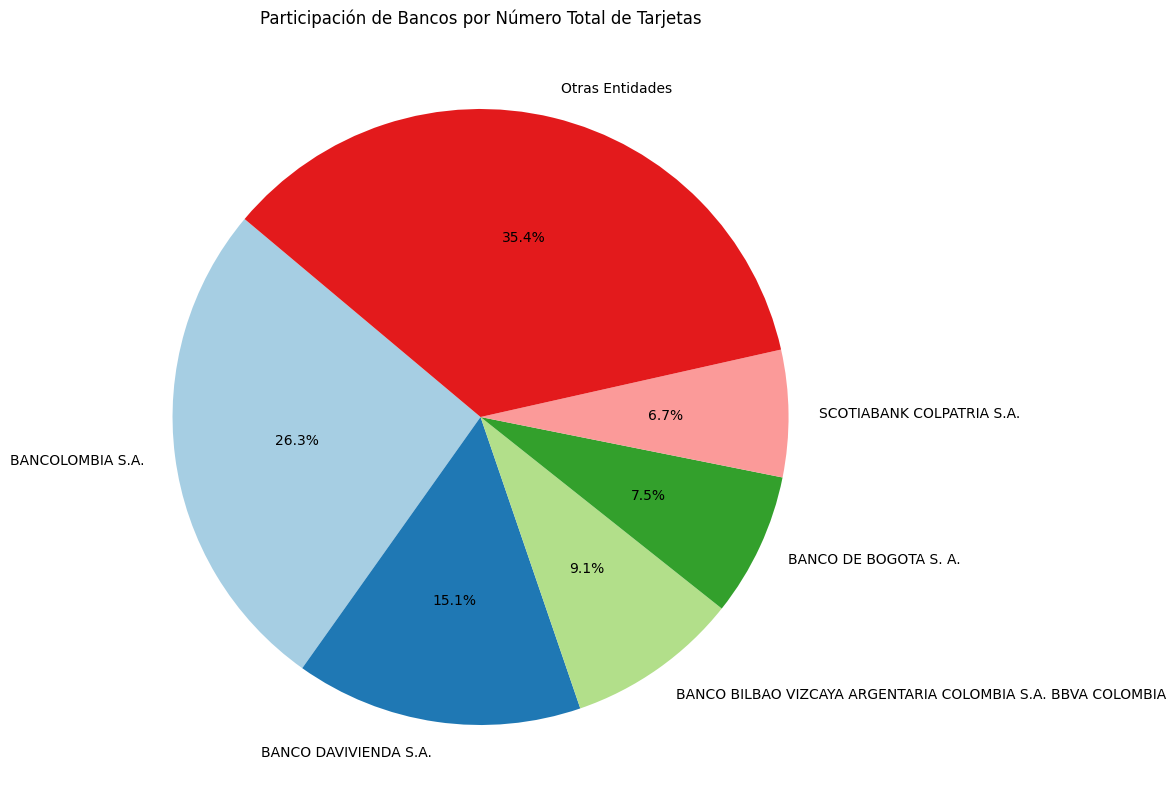

In [12]:
top_5_bancos = conteo_nombreentidad.nlargest(5)
otras = conteo_nombreentidad.drop(top_5_bancos.index).sum()
top_5_bancos['Otras Entidades'] = otras
plt.figure(figsize=(10, 10))
plt.pie(top_5_bancos,labels=top_5_bancos.index,autopct='%1.1f%%',startangle=140,colors=plt.cm.Paired(range(len(top_5_bancos))))
plt.title('Participación de Bancos por Número Total de Tarjetas')
plt.show()

Las tarjetas emitidas por bancoss, son instrumentos financieros que de acuerdo a su tipificación sirven para manejar recursos ecónómicos.

Las tarjetas de débito permiten realizar compras y retirar efectivo directamente desde la cuenta bancaria del titular, utilizando solo el dinero disponible en dicha cuenta. En contraste, las tarjetas de crédito permiten gastar hasta un límite preestablecido de crédito, con la obligación de pagar el monto adeudado en una fecha futura. Mientras las tarjetas de débito ofrecen un acceso inmediato a los fondos disponibles, las tarjetas de crédito proporcionan flexibilidad en los pagos y pueden involucrar intereses si el saldo no se paga en su totalidad

En Colombia hay expedidas más de $5 millones de tarjetas entre débito y crédito distribuidas en 55 entidades financieras y los bancos con mayor participación en estos instrumentos financieros son:

Bancolombia 26,3%, Davivienda 15,1%, BBVA 9,1%, Banco de Bogotá 7,5%, Scotiabank Colpatria 67% y otras entidades 35,4% En Colombia hay expedidas más de $5 millones de tarjetas entre débito y crédito distribuidas en 55 entidades financieras y los bancos con mayor participación en estos instrumentos financieros son; Bancolombia 26,3%, Davivienda 15,1%, BBVA 9,1%, Banco de Bogotá 7,5%, Scotiabank Colpatria 67% y otras entidades 35,4% 

# Tarjetas Débito y Crédito y su Participación por Banco

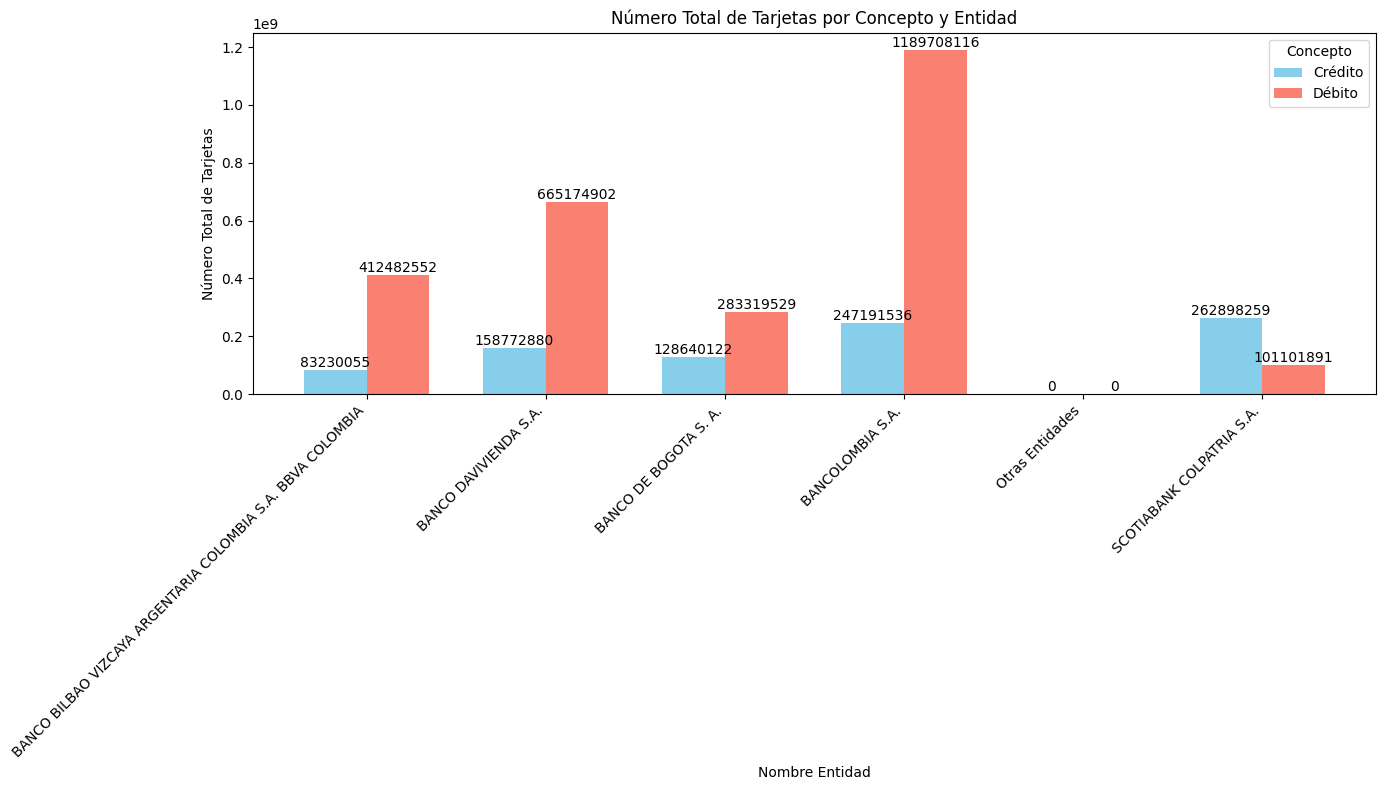

In [162]:
col_credito = 'Número total de tarjetas de crédito vigentes  a la fecha de corte'
col_debito = 'Número total de tarjetas débito  vigentes  a la fecha de corte'
conteo_nombreentidad_credito = data_filtrada.groupby('NOMBREENTIDAD')[col_credito].sum()
conteo_nombreentidad_debito = data_filtrada.groupby('NOMBREENTIDAD')[col_debito].sum()
top_5_bancos_credito = conteo_nombreentidad_credito.nlargest(5)
otras_credito = conteo_nombreentidad_credito.drop(top_5_bancos_credito.index).sum()
top_5_bancos_credito['Otras Entidades'] = otras_credito
top_5_bancos_debito = conteo_nombreentidad_debito.nlargest(5)
otras_debito = conteo_nombreentidad_debito.drop(top_5_bancos_debito.index).sum()
top_5_bancos_debito['Otras Entidades'] = otras_debito
combined_df = pd.DataFrame({
    'Crédito': top_5_bancos_credito,
    'Débito': top_5_bancos_debito}).fillna(0)
fig, ax = plt.subplots(figsize=(14, 8))


width = 0.35


positions = range(len(combined_df))


bar1 = ax.bar([p - width/2 for p in positions], combined_df['Crédito'], width=width, label='Crédito', color='skyblue')
bar2 = ax.bar([p + width/2 for p in positions], combined_df['Débito'], width=width, label='Débito', color='salmon')


for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')
ax.set_title('Número Total de Tarjetas por Concepto y Entidad')
ax.set_xlabel('Nombre Entidad')
ax.set_ylabel('Número Total de Tarjetas')
ax.set_xticks(positions)
ax.set_xticklabels(combined_df.index, rotation=45, ha='right')
ax.legend(title='Concepto')
plt.tight_layout()
plt.show()

Dentro del Top 5 de Bancos, se evidencia que Bancolombia es el mayor emisor de tarjetas de débito mientras Scotiabank Colpatria es el mayor emisor de tarjetas de Crédito.

Las tarjetas emitidas por bancos, son instrumentos financieros que de acuerdo a su tipificación sirven para manejar recursos ecónómicos.
Las tarjetas de débito permiten realizar compras y retirar efectivo directamente desde la cuenta bancaria del titular, utilizando solo el dinero disponible en dicha cuenta. En contraste, las tarjetas de crédito permiten gastar hasta un límite preestablecido de crédito, con la obligación de pagar el monto adeudado en una fecha futura. Mientras las tarjetas de débito ofrecen un acceso inmediato a los fondos disponibles, las tarjetas de crédito proporcionan flexibilidad en los pagos y pueden involucrar intereses si el saldo no se paga en su totalidad.

In [122]:
data_barras = data_filtrada[data_filtrada.NOMBREENTIDAD.isin(top_5_bancos)].groupby(['NOMBREENTIDAD','DESCRIPCION']).agg(sumatotal=('TOTAL_TARJETAS',sum))
data_barras

C:\Users\jemorales\AppData\Local\Temp\ipykernel_78028\1720206419.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_barras = data_filtrada[data_filtrada.NOMBREENTIDAD.isin(top_5_bancos)].groupby(['NOMBREENTIDAD','DESCRIPCION']).agg(sumatotal=('TOTAL_TARJETAS',sum))


sumatotal
NOMBREENTIDAD                                      DESCRIPCION                                                     
BANCO BILBAO VIZCAYA ARGENTARIA COLOMBIA S.A. B... Número total de tarjetas de crédito vigentes  a...  8.323006e+07
                                                   Número total de tarjetas débito  vigentes  a la...  4.124826e+08
BANCO DAVIVIENDA S.A.                              Número total de tarjetas de crédito vigentes  a...  1.587729e+08
                                                   Número total de tarjetas débito  vigentes  a la...  6.651749e+08
BANCO DE BOGOTA S. A.                              Número total de tarjetas de crédito vigentes  a...  1.286401e+08
                                                   Número total de tarjetas débito  vigentes  a la...  2.833195e+08
BANCOLOMBIA S.A.                                   Número total de tarjetas de crédito vigentes  a...  2.471915e+08
                                                   Número total de tarjetas débito  vigentes  a la...  1.189708e+09
SCOTIABANK COLPATRIA S.A.                          Número total de tarjetas de crédito vigentes  a...  2.628983e+08
                                                   Número total de tarjetas débito  vigentes  a la...  1.011019e+08

In [145]:
data_filtrada = data_barras.pivot(index='NOMBREENTIDAD', columns='DESCRIPCION', values='sumatotal').fillna(0).reset_index()
data_filtrada.columns

Index(['NOMBREENTIDAD',
       'Número total de tarjetas de crédito vigentes  a la fecha de corte',
       'Número total de tarjetas débito  vigentes  a la fecha de corte'],
      dtype='object', name='DESCRIPCION')